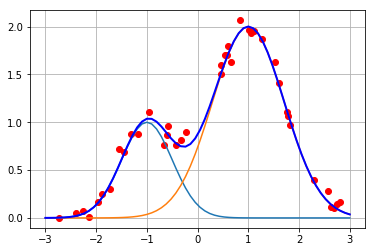

In [18]:
import numpy as np
import matplotlib.pylab as plt

def Gauss(x, mu, alpha):
    return np.exp(-0.5 * alpha * (x - mu)**2)

class MixGauss():
    '''
    return a Gaussian mixture
    constructor requires tuple of params ((A1, mu1, alpha1), (A2, mu2, alpha2)...)
    '''
    def __init__(self, params):
        self.K = len(params)
        self.params = params

    def out(self, x):
        self.outlist = []
        for Ak, muk, alphak in self.params:
            self.outlist.append(Ak * Gauss(x, muk, alphak))
        return np.array(self.outlist).sum(axis=0)

if __name__ == '__main__':
    pp = ((1., -1.0, 4.0), (2., 1.0, 2.0))
    xrng = (-3., 3.)
    ndat = 40
    xsamp = np.random.uniform(low=xrng[0], high=xrng[1], size=ndat)
    sgm = 0.1

    m = MixGauss(pp)
    f = m.out(xsamp)
    y = f + sgm * np.random.randn(xsamp.shape[0])

    plt.plot(xsamp, y, 'ro')
    plt.grid()
    plt.savefig('samples.pdf', transparent=True)

    xx = np.linspace(xrng[0], xrng[1], num=64)
    yy = m.out(xx)
    for est in m.outlist:
        plt.plot(xx, est, '-')
    plt.plot(xx, m.out(xx), 'b-', linewidth=2)
    plt.savefig('trueans.pdf', transparent=True)